In [1]:
import numpy as np
import add_funcs_revamped_total as af
import matplotlib.pyplot as plt
import time
import mass_estimation as me

## Read in the data

In [2]:
#Define some file paths
git_folder_loc = '/home/masterofalorgia/'
model_tracks_path = 'NII_nebular_phase/analysis/model_tracks/'
Ib_tracks_path = 'SECRETO/WISEREP_Ib/Ib_tracks/'
Ic_tracks_path = 'SECRETO/WISEREP_Ic/Ic_tracks/'
IIb_tracks_path = 'SECRETO/WISEREP_IIb/IIb_tracks/'

In [3]:
#Create arrays with file names for the different types
Ib_names = np.array(['SN1996aq', 'SN2004ao', 'SN2007Y', 'SN2009jf', 'SN2012fh',
                    'SN2015ah', 'SN2004dk', 'SN2012au', 'SN2015Q', 'SNMASTEROTJ1204'])
Ic_names = np.array(['SN1987M', 'SN1998bw', 'SN2003gf', 'SN2004aw', 'SN2007gr', 'SN2007I',
                    'SN2011bm', 'SN2014L', 'SN2015fn', 'SN2019yz', 'SNPTF12gzk'])
IIb_names = np.array(['SN1993J', 'SN2001ig', 'SN2003bg', 'SN2008ax', 'SN2008bo', 'SN2011dh',
                    'SN2011ei', 'SN2011hs', 'SN2013df', 'SN2016gkg', 'SN2020acat', 'SNASASSN14az'])

In [4]:
#Read in the model tracks
string_masses = np.array(['3p30', '4p00', '6p00', '8p00']) #Write as 'xpxx'
model_masses = np.array([3.3, 4.0, 6.0, 8.0])
version_name = 'v1p0'
model_tracks = []
for i in range(len(string_masses)):
    track = np.loadtxt(git_folder_loc + model_tracks_path + 'NII_track_he_' + string_masses[i] + '_' + version_name + '.csv',
              delimiter = ',')
    model_tracks.append(track)

## Get the masses

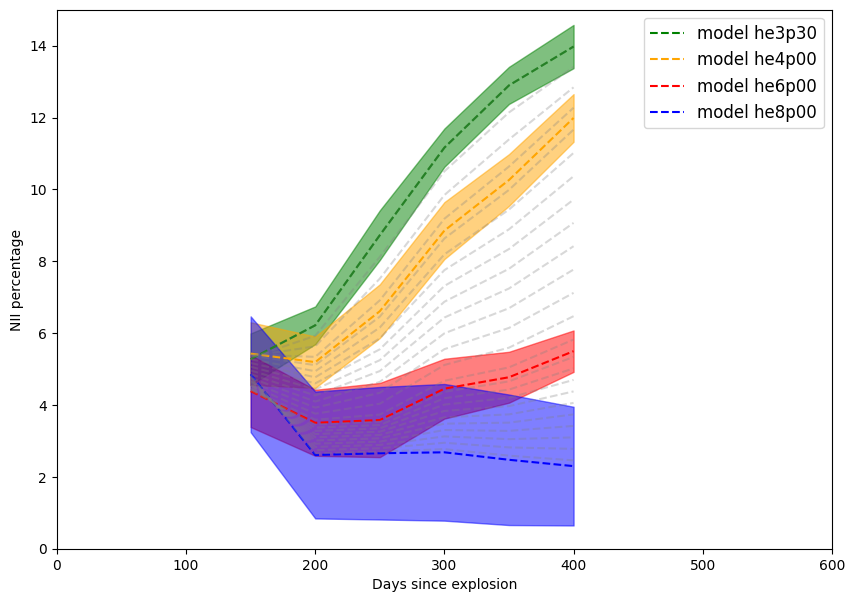

In [5]:
#First plot out the problem
fig, ax = plt.subplots(1)

model_colours = ['green', 'orange', 'red', 'blue']
for p in range(len(model_tracks)):
    this_track = model_tracks[p]
    track_epochs, NII_percentages, NII_sigmas = this_track[:, 0], this_track[:, 1], this_track[:, 2]
    ax.plot(track_epochs, NII_percentages, linestyle = '--', c = model_colours[p], label = 'model he' + string_masses[p])
    ax.fill_between(track_epochs, NII_percentages-NII_sigmas, NII_percentages+NII_sigmas, color = model_colours[p], alpha = 0.5)

test_masses = np.arange(3.3, 8.01, 0.2)
for q in range(len(test_masses)):
    m_guess = test_masses[q]
    y_guess = me.get_interpolated_line(model_tracks[0][:, 0], model_tracks, model_masses, m_guess)
    ax.plot(model_tracks[0][:, 0], y_guess, linestyle = '--', alpha = 0.3, c='gray')
    
    
ax.set_xlim(0, 600)
ax.set_ylim(0, 15)
ax.legend(fontsize = 12)

fig.set_size_inches(10, 7)
ax.set_xlabel('Days since explosion')
ax.set_ylabel('NII percentage')
#ax.set_yscale('log')
#plt.savefig('Nitrogen_content_Ib_total_140.png')
plt.show()

Getting mass for  SN1996aq


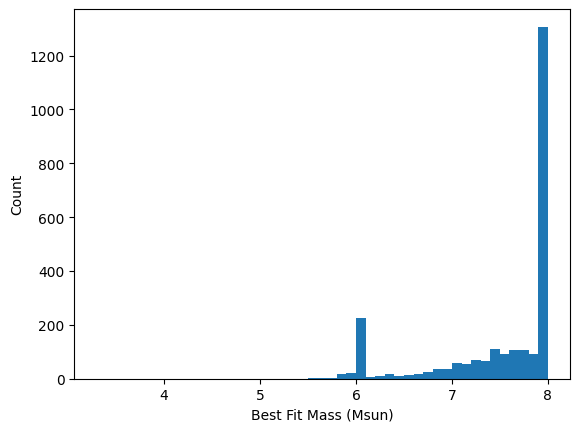

Best fitting mass:  8.00  +  0.00  -  0.40

Getting mass for  SN2004ao
Here are epcohs before 200: do not trust the following number


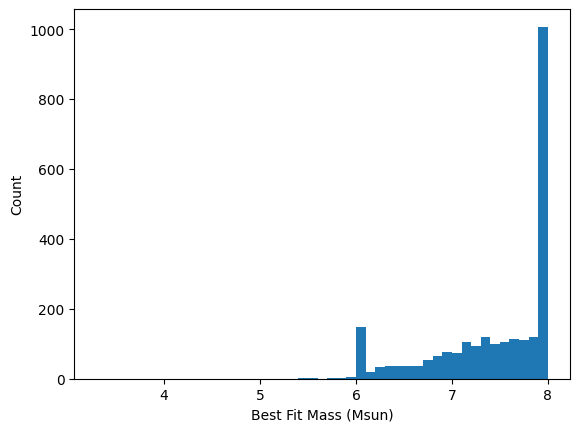

Best fitting mass:  8.00  +  0.00  -  0.70

Getting mass for  SN2007Y


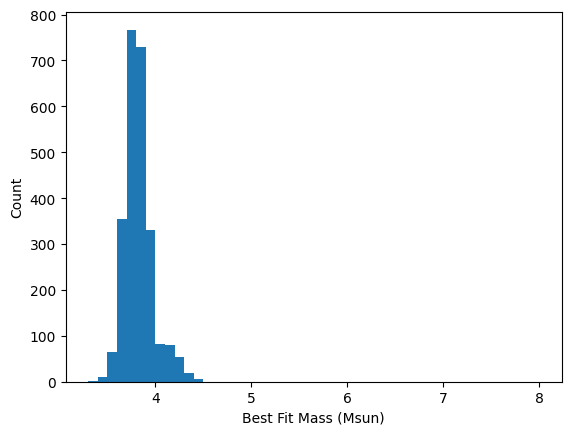

Best fitting mass:  3.80  +  0.10  -  0.10

Getting mass for  SN2009jf


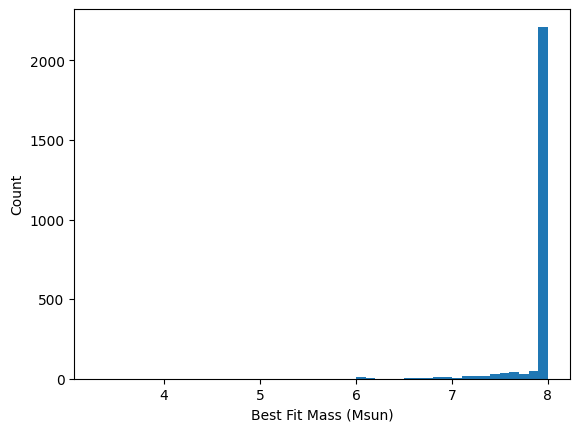

Best fitting mass:  8.00  +  0.00  -  0.00

Getting mass for  SN2012fh
Here are epcohs before 200: do not trust the following number


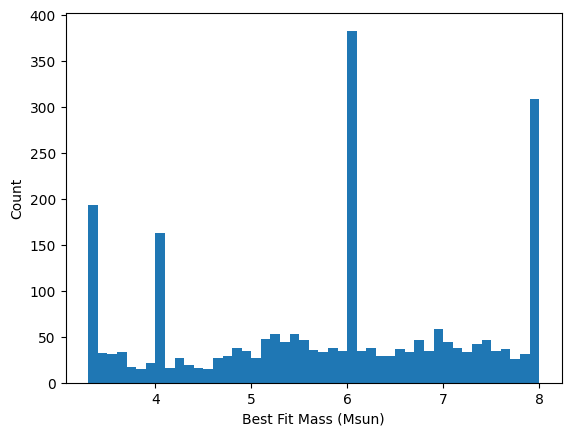

Best fitting mass:  6.10  +  1.90  -  1.40

Getting mass for  SN2015ah
Here are epcohs before 200: do not trust the following number


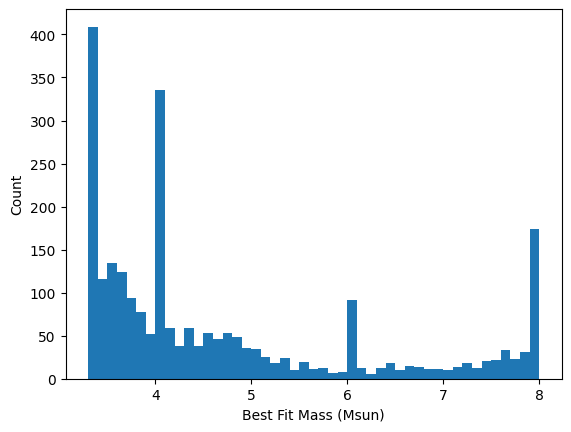

Best fitting mass:  3.40  +  1.50  -  0.00

Getting mass for  SN2004dk


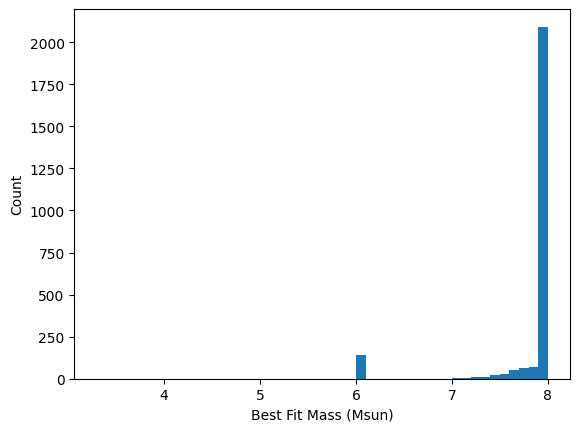

Best fitting mass:  8.00  +  0.00  -  0.00

Getting mass for  SN2012au


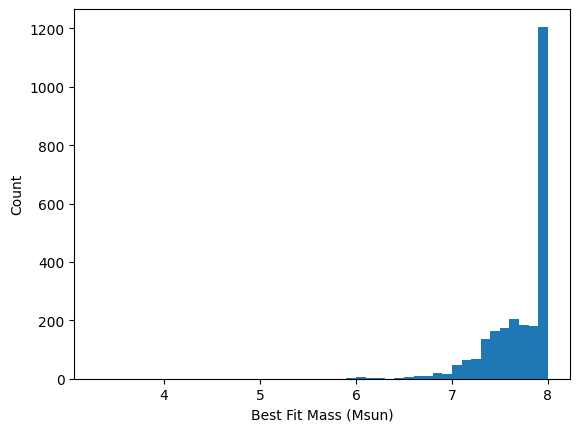

Best fitting mass:  8.00  +  0.00  -  0.30

Getting mass for  SN2015Q


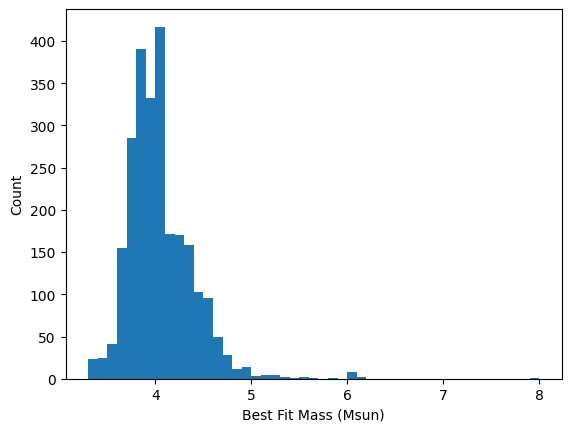

Best fitting mass:  4.10  +  0.20  -  0.30

Getting mass for  SNMASTEROTJ1204
Here are epcohs before 200: do not trust the following number


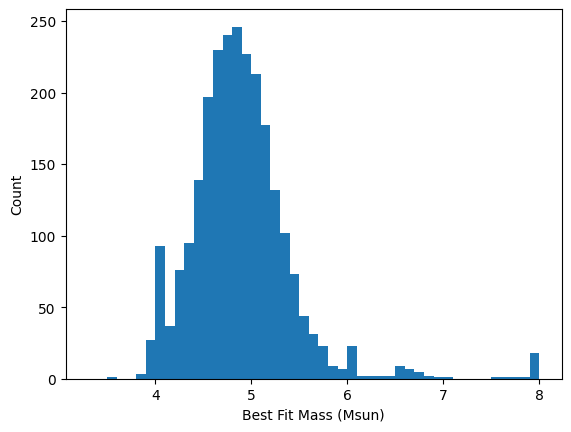

Best fitting mass:  4.90  +  0.40  -  0.40



In [6]:
#The cell doing the actual work Ib
predicted_masses_Ib_low, predicted_masses_Ib_mid, predicted_masses_Ib_high = np.zeros(len(Ib_names)), np.zeros(len(Ib_names)), np.zeros(len(Ib_names))

for i in range(len(Ib_names)):
    sn_name = Ib_names[i]
    
    #Read in the track
    obs_track = np.loadtxt(git_folder_loc + Ib_tracks_path + 'NII_track_' + sn_name + '.csv',
              delimiter = ',') 
    #Get the mass
    print('Getting mass for ', sn_name)
    
    try:
        if np.min(obs_track[:, 0]) < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(obs_track[:, 0], obs_track[:, 1], obs_track[:, 2], model_tracks=model_tracks, plot = True)
        
    except:
        if obs_track[0] < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(np.array([obs_track[0]]), np.array([obs_track[1]]), np.array([obs_track[2]]), model_tracks=model_tracks, plot = True)
        
    predicted_masses_Ib_low[i] = mass_68_left
    predicted_masses_Ib_mid[i] = best_mass
    predicted_masses_Ib_high[i] = mass_68_right
        
    print()
    


Getting mass for  SN1987M
Here are epcohs before 200: do not trust the following number


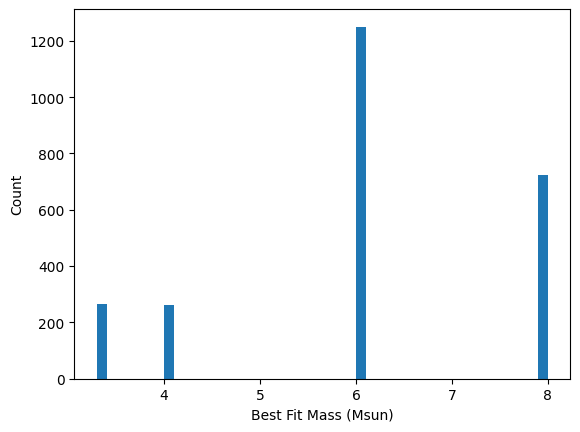

Best fitting mass:  6.10  +  1.90  -  2.30

Getting mass for  SN1998bw


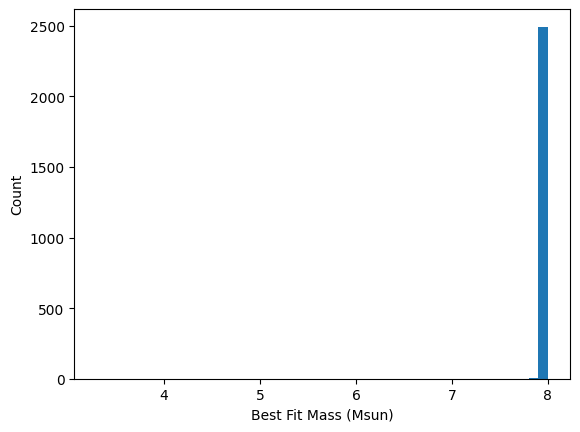

Best fitting mass:  8.00  +  0.00  -  0.00

Getting mass for  SN2003gf
Here are epcohs before 200: do not trust the following number


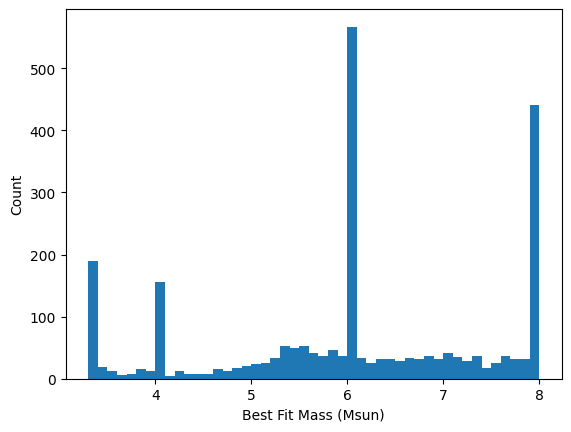

Best fitting mass:  6.10  +  1.90  -  1.20

Getting mass for  SN2004aw


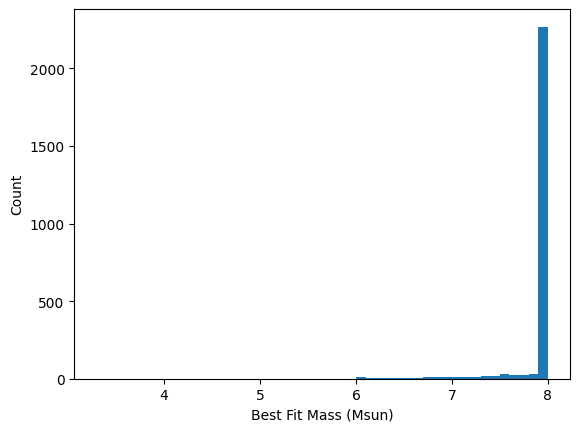

Best fitting mass:  8.00  +  0.00  -  0.00

Getting mass for  SN2007gr
Here are epcohs before 200: do not trust the following number


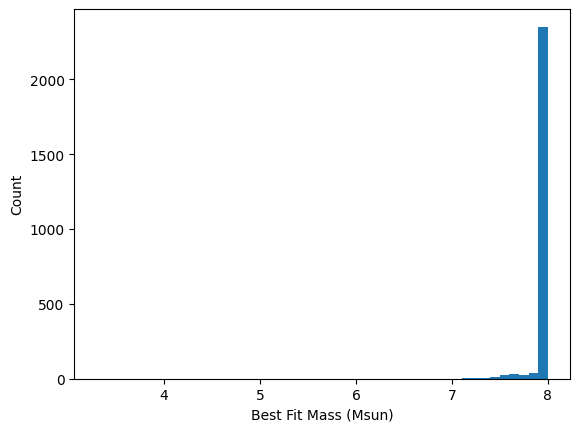

Best fitting mass:  8.00  +  0.00  -  0.00

Getting mass for  SN2007I
Here are epcohs before 200: do not trust the following number


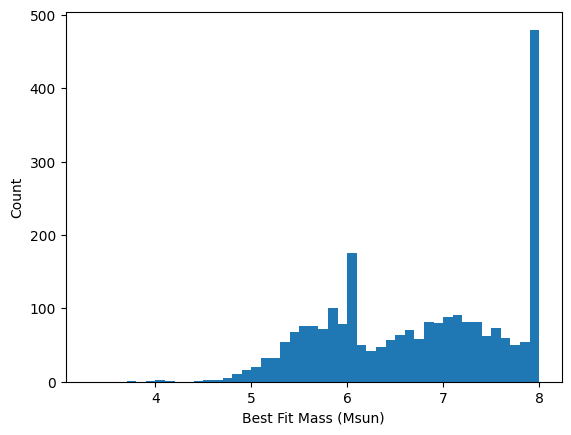

Best fitting mass:  8.00  +  0.00  -  1.90

Getting mass for  SN2011bm


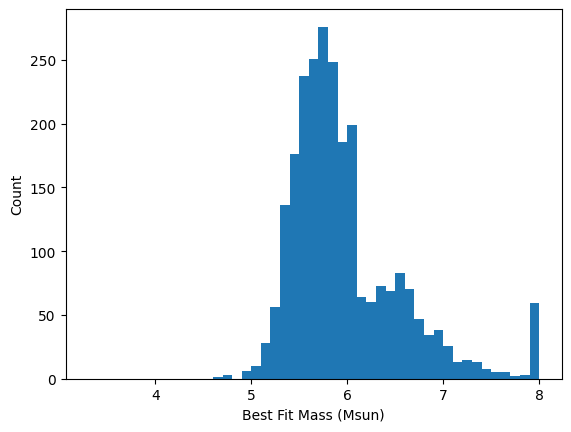

Best fitting mass:  5.80  +  0.30  -  0.40

Getting mass for  SN2014L
Here are epcohs before 200: do not trust the following number


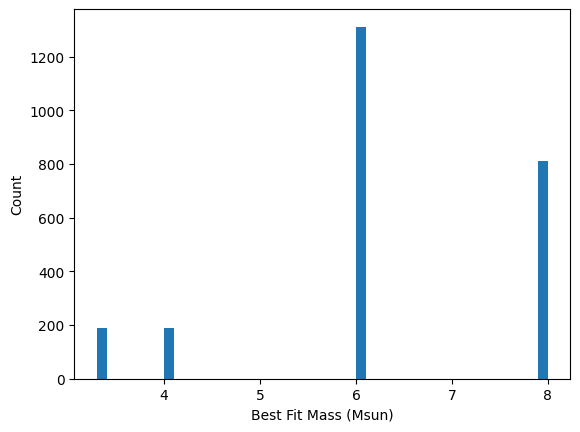

Best fitting mass:  6.10  +  1.90  -  1.50

Getting mass for  SN2015fn


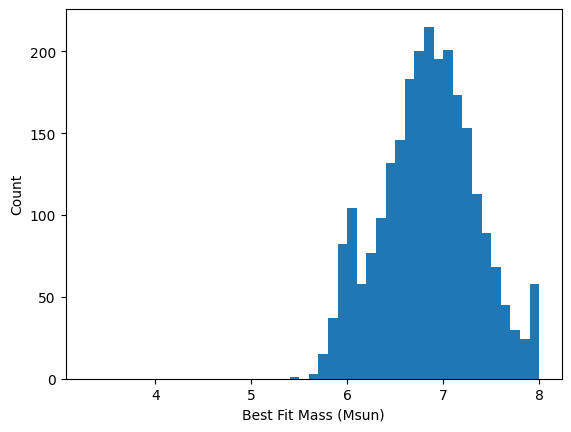

Best fitting mass:  6.90  +  0.50  -  0.40

Getting mass for  SN2019yz
Here are epcohs before 200: do not trust the following number


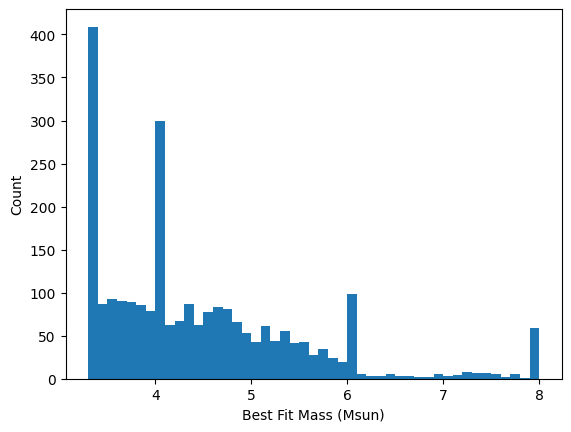

Best fitting mass:  3.40  +  1.40  -  0.00

Getting mass for  SNPTF12gzk


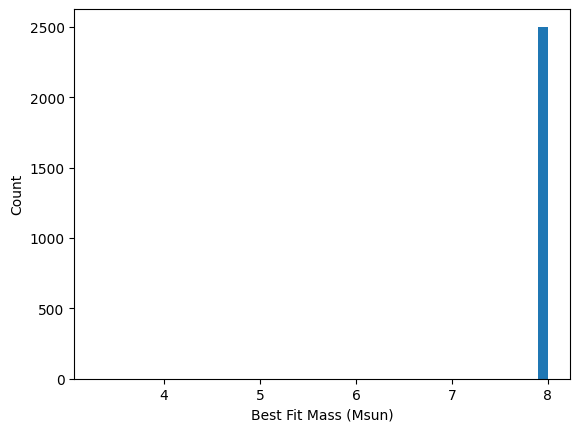

Best fitting mass:  8.00  +  0.00  -  0.00



In [7]:
#The cell doing the actual work Ic
predicted_masses_Ic_low, predicted_masses_Ic_mid, predicted_masses_Ic_high = np.zeros(len(Ic_names)), np.zeros(len(Ic_names)), np.zeros(len(Ic_names))

for i in range(len(Ic_names)):
    sn_name = Ic_names[i]
    
    #Read in the track
    obs_track = np.loadtxt(git_folder_loc + Ic_tracks_path + 'NII_track_' + sn_name + '.csv',
              delimiter = ',') 
    #Get the mass
    print('Getting mass for ', sn_name)
    
    try:
        if np.min(obs_track[:, 0]) < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(obs_track[:, 0], obs_track[:, 1], obs_track[:, 2], model_tracks=model_tracks, plot = True)
        
    except:
        if obs_track[0] < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(np.array([obs_track[0]]), np.array([obs_track[1]]), np.array([obs_track[2]]), model_tracks=model_tracks, plot = True)
    
    predicted_masses_Ic_low[i] = mass_68_left
    predicted_masses_Ic_mid[i] = best_mass
    predicted_masses_Ic_high[i] = mass_68_right
    
    print()

Getting mass for  SN1993J
Here are epcohs before 200: do not trust the following number


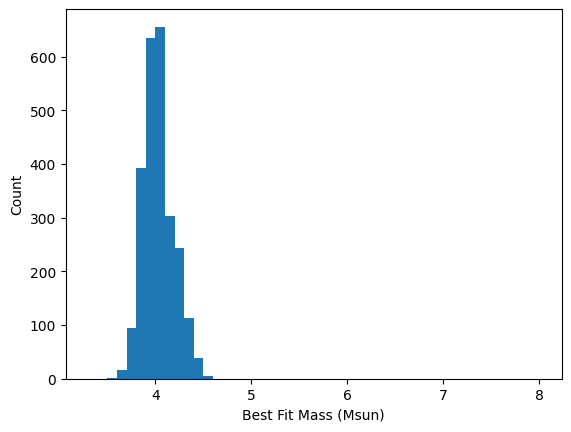

Best fitting mass:  4.10  +  0.10  -  0.20

Getting mass for  SN2001ig


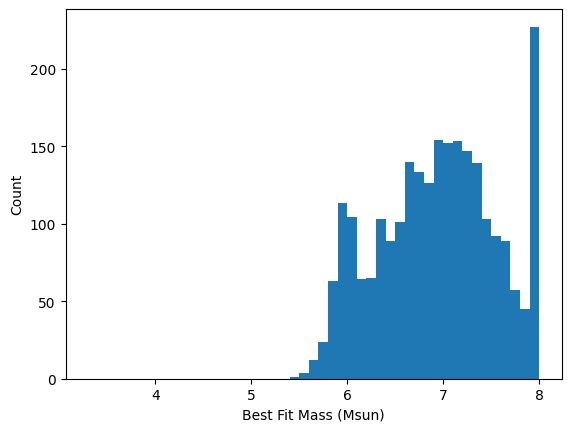

Best fitting mass:  8.00  +  0.00  -  1.30

Getting mass for  SN2003bg
Here are epcohs before 200: do not trust the following number


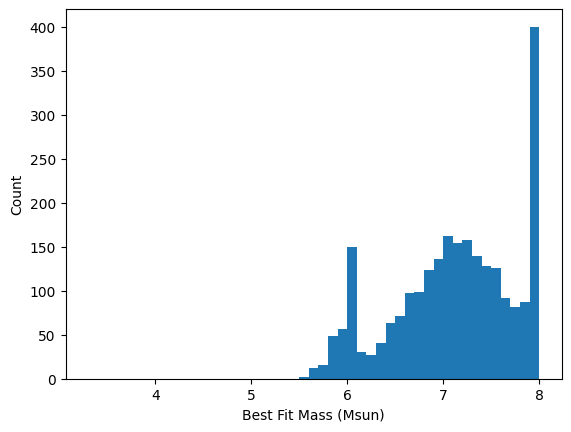

Best fitting mass:  8.00  +  0.00  -  1.10

Getting mass for  SN2008ax
Here are epcohs before 200: do not trust the following number


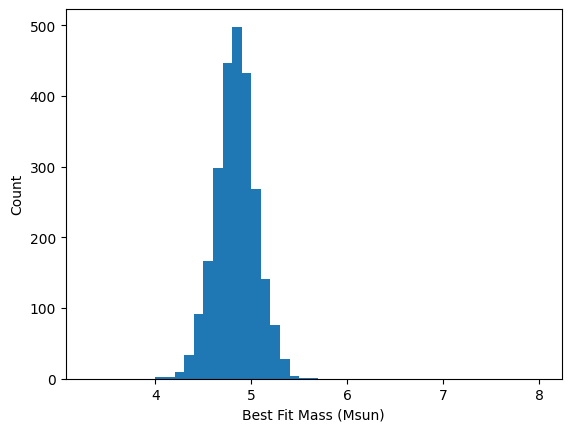

Best fitting mass:  4.90  +  0.20  -  0.20

Getting mass for  SN2008bo
Here are epcohs before 200: do not trust the following number


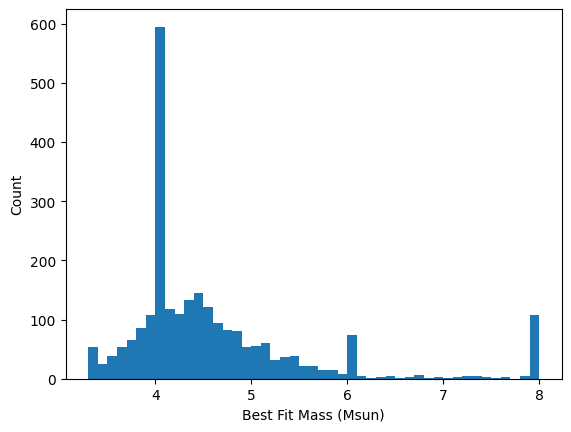

Best fitting mass:  4.10  +  0.80  -  0.30

Getting mass for  SN2011dh
Here are epcohs before 200: do not trust the following number


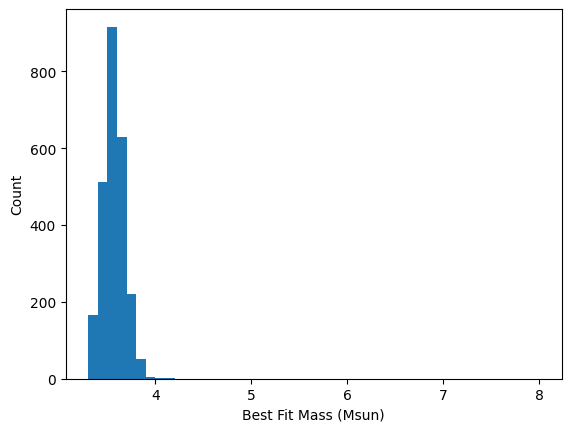

Best fitting mass:  3.60  +  0.10  -  0.10

Getting mass for  SN2011ei


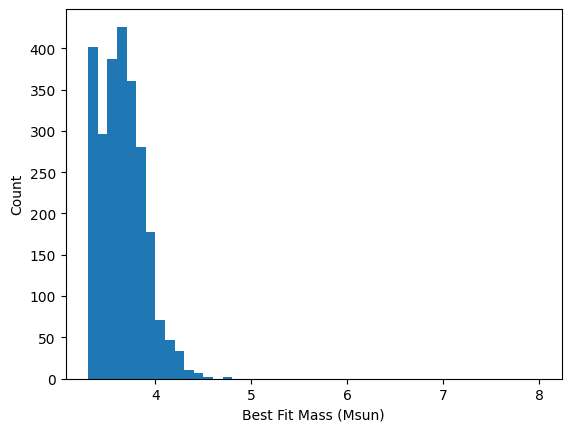

Best fitting mass:  3.70  +  0.10  -  0.30

Getting mass for  SN2011hs
Here are epcohs before 200: do not trust the following number


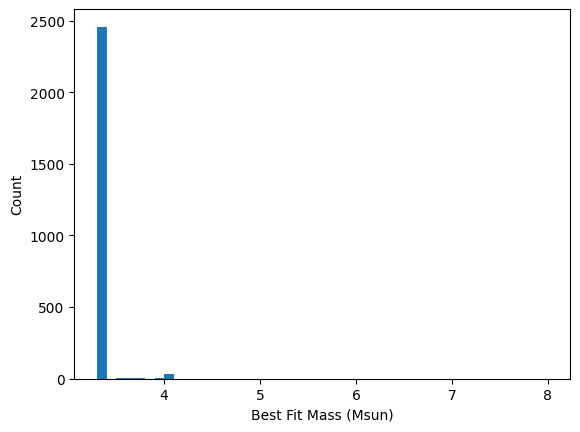

Best fitting mass:  3.40  +  0.00  -  0.00

Getting mass for  SN2013df
Here are epcohs before 200: do not trust the following number


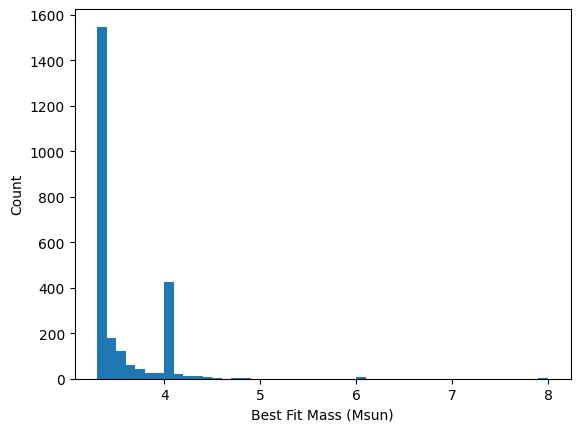

Best fitting mass:  3.40  +  0.10  -  0.00

Getting mass for  SN2016gkg


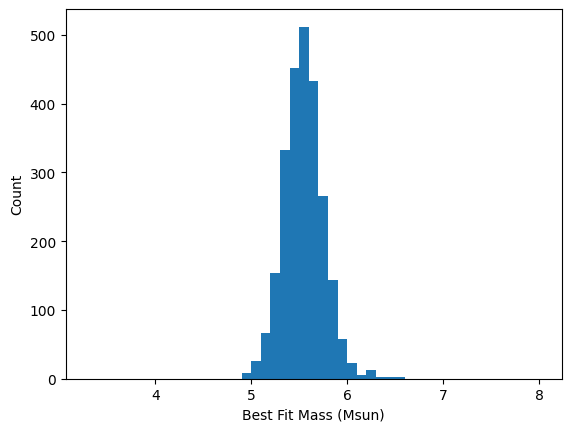

Best fitting mass:  5.60  +  0.10  -  0.20

Getting mass for  SN2020acat
Here are epcohs before 200: do not trust the following number


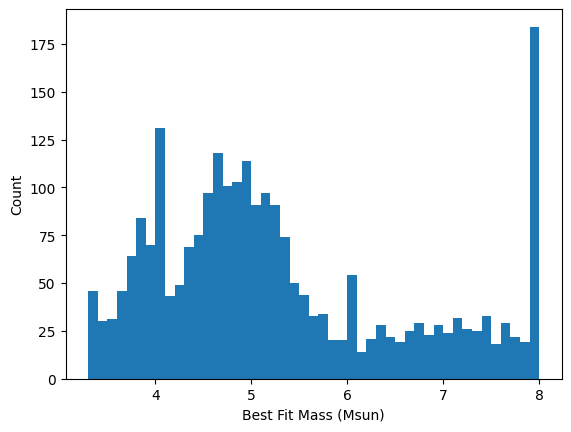

Best fitting mass:  8.00  +  0.00  -  3.40

Getting mass for  SNASASSN14az
Here are epcohs before 200: do not trust the following number


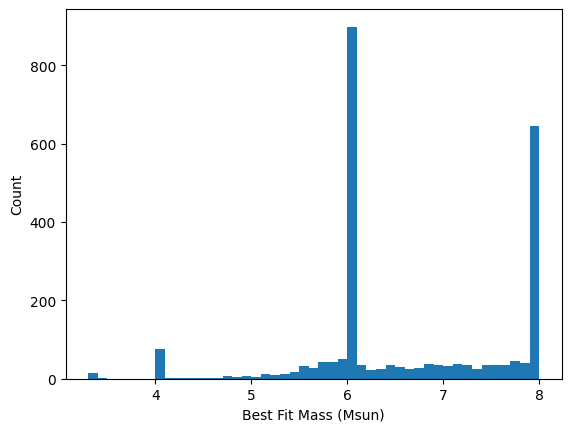

Best fitting mass:  6.10  +  1.90  -  0.50



In [8]:
#The cell doing the actual work IIb
predicted_masses_IIb_low, predicted_masses_IIb_mid, predicted_masses_IIb_high = np.zeros(len(IIb_names)), np.zeros(len(IIb_names)), np.zeros(len(IIb_names))
for i in range(len(IIb_names)):
    sn_name = IIb_names[i]
    
    #Read in the track
    obs_track = np.loadtxt(git_folder_loc + IIb_tracks_path + 'NII_track_' + sn_name + '.csv',
              delimiter = ',') 
    #Get the mass
    print('Getting mass for ', sn_name)
    
    try:
        if np.min(obs_track[:, 0]) < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(obs_track[:, 0], obs_track[:, 1], obs_track[:, 2], model_tracks=model_tracks, plot = True)
        
    except:
        if obs_track[0] < 200:
            print('Here are epcohs before 200: do not trust the following number')
        best_mass, mass_68_left, mass_68_right = me.mass_determinator_mcmc(np.array([obs_track[0]]), np.array([obs_track[1]]), np.array([obs_track[2]]), model_tracks=model_tracks, plot = True)
        
    predicted_masses_IIb_low[i] = mass_68_left
    predicted_masses_IIb_mid[i] = best_mass
    predicted_masses_IIb_high[i] = mass_68_right
        
    print()

## Make a nice plot

In [9]:
#Lets read in the predicted masses from the literature

metadata_Ib = np.loadtxt(git_folder_loc + 'SECRETO/WISEREP_Ib/metadata.csv',
              delimiter = ',', dtype = str)
metadata_Ic = np.loadtxt(git_folder_loc + 'SECRETO/WISEREP_Ic/metadata.csv',
              delimiter = ',', dtype = str)
metadata_IIb = np.loadtxt(git_folder_loc + 'SECRETO/WISEREP_IIb/metadata.csv',
              delimiter = ',', dtype = str)

In [10]:
#Prepare arrays for plotting

masses_Ib_lit_low, masses_Ic_lit_low, masses_IIb_lit_low = np.zeros(len(metadata_Ib)), np.zeros(len(metadata_Ic)), np.zeros(len(metadata_IIb))
masses_Ib_lit_high, masses_Ic_lit_high, masses_IIb_lit_high = np.zeros(len(metadata_Ib)), np.zeros(len(metadata_Ic)), np.zeros(len(metadata_IIb))
names_Ib_lit, names_Ic_lit, names_IIb_lit = np.zeros(len(metadata_Ib), dtype = object), np.zeros(len(metadata_Ic), dtype = object), np.zeros(len(metadata_IIb), dtype = object)

#Do it for Ib
for i in range(len(masses_Ib_lit_low)):
    names_Ib_lit[i] = metadata_Ib[i][0]
    if metadata_Ib[i][-2] == '--':
        if metadata_Ib[i][-4] == '--':
            #There are no literature guesses for the masses, so we put -1 to mask these out later
            masses_Ib_lit_low[i] = -1
            masses_Ib_lit_high[i] = -1
        else:
            #Think of something...
            pass
            
    else:
        #Hurray, there are literature values! Lets 
        masses_Ib_lit_low[i] = metadata_Ib[i][-2]
        masses_Ib_lit_high[i] = metadata_Ib[i][-1]
        
#Do it for Ic        
for i in range(len(masses_Ic_lit_low)):
    names_Ic_lit[i] = metadata_Ic[i][0]
    if metadata_Ic[i][-2] == '--':
        if metadata_Ic[i][-4] == '--':
            #There are no literature guesses for the masses, so we put -1 to mask these out later
            masses_Ic_lit_low[i] = -1
            masses_Ic_lit_high[i] = -1
        else:
            #Think of something...
            pass
            
    else:
        #Hurray, there are literature values! Lets 
        masses_Ic_lit_low[i] = metadata_Ic[i][-2]
        masses_Ic_lit_high[i] = metadata_Ic[i][-1]
        
#Do it for IIb        
for i in range(len(masses_IIb_lit_low)):
    names_IIb_lit[i] = metadata_IIb[i][0]
    if metadata_IIb[i][-2] == '--':
        if metadata_IIb[i][-4] == '--':
            #There are no literature guesses for the masses, so we put -1 to mask these out later
            masses_IIb_lit_low[i] = -1
            masses_IIb_lit_high[i] = -1
        else:
            #Think of something...
            pass
            
    else:
        #Hurray, there are literature values! Lets 
        masses_IIb_lit_low[i] = metadata_IIb[i][-2]
        masses_IIb_lit_high[i] = metadata_IIb[i][-1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SN1998bw
9.0 [[0.]
 [0.]] 3.5 4.5
SN1987M
-1.0 [[0.]
 [0.]] 0.0 0.0
SN2019yz
-1.0 [[0.]
 [0.]] 5.2 5.2
SN2015fn
0.0 [[0.]
 [0.]] 0.0 0.0
SN2014L
-1.0 [[0.]
 [0.]] 3.0 4.0
SN2011bm
0.0 [[0.]
 [0.]] 3.0 4.0
SN2007I
-1.0 [[0.]
 [0.]] 3.3 4.0
SN2007gr
-1.0 [[0.]
 [0.]] -1.0 -1.0
SN2004aw
-1.0 [[0.]
 [0.]] -1.0 -1.0
SN2003gf
-1.0 [[0.]
 [0.]] -1.0 -1.0
SNPTF12gzk
0.0 [[0.]
 [0.]] -1.0 -1.0
SN1993J
[[0.5]
 [0.5]] 3.5 4.5
SN2020acat
[[0.]
 [0.]] 0.0 0.0
SN2016gkg
[[0.]
 [0.]] 5.2 5.2
SN2013df
[[0.]
 [0.]] 0.0 0.0
SN2011hs
[[0.5]
 [0.5]] 3.0 4.0
SN2011ei
[[0.5]
 [0.5]] 3.0 4.0
SN2011dh
[[0.35]
 [0.35]] 3.3 4.0
SN2008bo
[[0.]
 [0.]] -1.0 -1.0
SN2008ax
[[0.]
 [0.]] -1.0 -1.0
SN2003bg
[[0.]
 [0.]] -1.0 -1.0
SN2001ig
[[0.]
 [0.]] -1.0 -1.0
SNASASSN14az
[[0.]
 [0.]] -1.0 -1.0


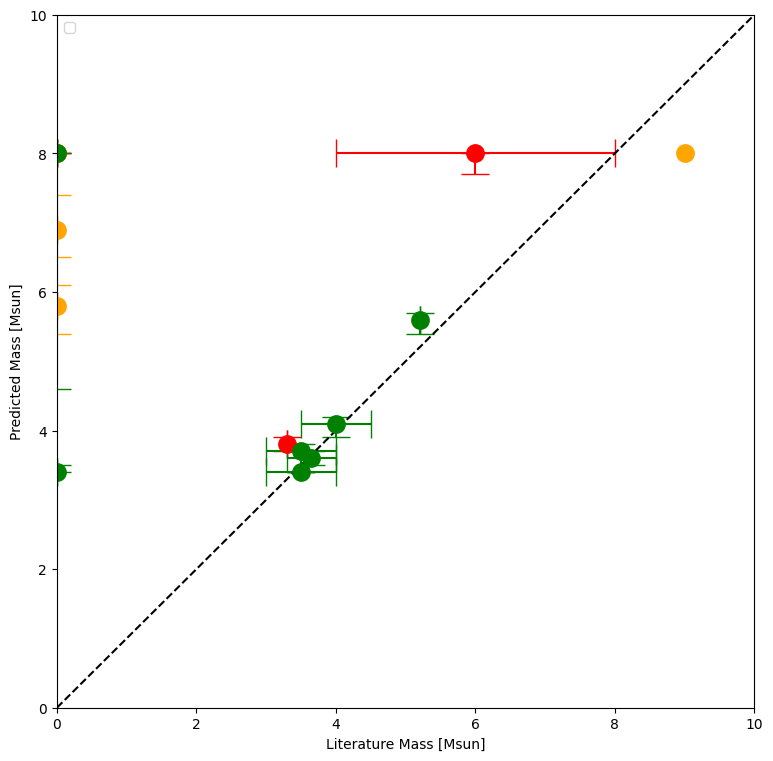

In [18]:
#And now we plot it
fig, ax = plt.subplots(1)

#For Ib
for i in range(len(names_Ib_lit)):
    lit_name = names_Ib_lit[i]
    prediction_index = np.where(Ib_names == lit_name)[0][0]
    
    literature_mean = np.mean([masses_Ib_lit_low[i], masses_Ib_lit_high[i]])
    literature_errs = np.array([[literature_mean-masses_Ib_lit_low[i], 
                                      masses_Ib_lit_high[i]-literature_mean]]).T
    prediction_mean = predicted_masses_Ib_mid[prediction_index]
    prediction_errs = np.array([[prediction_mean-predicted_masses_Ib_low[prediction_index],
                                     predicted_masses_Ib_high[prediction_index]-prediction_mean]]).T
    
    ax.errorbar(x = literature_mean,
                y = prediction_mean,
                yerr = prediction_errs,
                xerr = literature_errs,
                fmt = '.',
                ms = 25,
                capsize = 10,
                color = 'red')
    
    
#For Ic
for i in range(len(names_Ic_lit)):
    lit_name = names_Ic_lit[i]
    print(lit_name)
    prediction_index = np.where(Ic_names == lit_name)[0][0]
    
    literature_mean = np.mean([masses_Ic_lit_low[i], masses_Ic_lit_high[i]])
    literature_errs = np.array([[literature_mean-masses_Ic_lit_low[i], 
                                      masses_Ic_lit_high[i]-literature_mean]]).T
    print(literature_mean, literature_errs, masses_IIb_lit_low[i], masses_IIb_lit_high[i])
    prediction_mean = predicted_masses_Ic_mid[prediction_index]
    prediction_errs = np.array([[prediction_mean-predicted_masses_Ic_low[prediction_index],
                                     predicted_masses_Ic_high[prediction_index]-prediction_mean]]).T
    
    if masses_Ic_lit_low[i] == masses_Ic_lit_high[i] and prediction_errs[0] == prediction_errs[1]:
        ax.errorbar(x = literature_mean,
                y = prediction_mean,
                fmt = '.',
                ms = 25,
                capsize = 10,
                color = 'orange')
    else:
        ax.errorbar(x = literature_mean,
                    y = prediction_mean,
                    yerr = prediction_errs,
                    xerr = literature_errs,
                    fmt = '.',
                    ms = 25,
                    capsize = 10,
                    color = 'orange')
    
#For IIb
for i in range(len(names_IIb_lit)):
    lit_name = names_IIb_lit[i]
    print(lit_name)
    prediction_index = np.where(IIb_names == lit_name)[0][0]
    
    literature_mean = np.mean([masses_IIb_lit_low[i], masses_IIb_lit_high[i]])
    literature_errs = np.array([[literature_mean-masses_IIb_lit_low[i], 
                                      masses_IIb_lit_high[i]-literature_mean]]).T
    print( literature_errs, masses_IIb_lit_low[i], masses_IIb_lit_high[i])
    prediction_mean = predicted_masses_IIb_mid[prediction_index]
    prediction_errs = np.array([[prediction_mean-predicted_masses_IIb_low[prediction_index],
                                     predicted_masses_IIb_high[prediction_index]-prediction_mean]]).T
    
    ax.errorbar(x = literature_mean,
                y = prediction_mean,
                yerr = prediction_errs,
                xerr = literature_errs,
                fmt = '.',
                ms = 25,
                capsize = 10,
                color = 'green')
    
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.plot(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100), np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100), linestyle = '--', c = 'black')
ax.set_xlabel('Literature Mass [Msun]')
ax.set_ylabel('Predicted Mass [Msun]')

ax.legend()
fig.set_size_inches(9, 9)
plt.show()

## Store the best masses + errors